In [10]:
#package import 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import pickle
import difflib 
from wordcloud import WordCloud
import numpy as np 
import math
from pandas_summary import DataFrameSummary 
from scipy import stats
from scipy.stats import skew

In [11]:
#ignore warnings during the project 
warnings.simplefilter("ignore") 

In [12]:
#importing plotly modules --- it would help in implementing interactive plots 
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go 

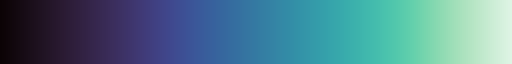

In [13]:
#set color palette for the plots 
sns.color_palette("mako", as_cmap=True) 

In [14]:
# Set display options to show all rows
#pd.set_option('display.max_rows', None)

In [15]:
#import the data that contains income 
private_public_income = pd.read_excel("C:\\Users\\nourd\\Downloads\\Project Final Report-20231220T165211Z-001\\Project Final Report\\datasets\\fundraising_data.xlsx") 

In [18]:
private_public_income.shape

(30227, 75)

### Functions used

In [19]:
#clean up the textual data in the notes
def calculate_similarity(row):
    concatenated_values = str(row['Type']) + str(row['Item'])
    similarity = difflib.SequenceMatcher(None, concatenated_values, str(row['Notes'])).ratio()
    return similarity

In [20]:
# Define a custom function that applies your condition
def group_creation(category):
    if category == 'Public Funds':
        return 'Public Funds'
    else:
        return 'Private Sector'

private_public_income['Group'] = private_public_income['Category'].apply(group_creation)

In [21]:
#we want to create a new column where we classify organizations into non governmental and intergovernmental
def organization_category(organization): 
    if organization in ['WFP','UNI','UHR']: 
        return 'Intergovernmental Organizations (IGO)' 
    else: 
        return 'Non-Governmental Organizations (NGOs)'  
#apply the function to our dataset

private_public_income['Organization Class'] = private_public_income['OrgCode'].apply(organization_category)


In [22]:
#countplot general function to use for visualization 

def countplot_graphing(dataset,column,hue = None,orient = 'v' ,stat = 'percent',figure_size = (8, 6)) : 
    #set the order in the dataset 
    order = dataset[column].value_counts(normalize = True).index
    # Set the default figure size
    plt.rcParams['figure.figsize'] = figure_size
    #plot the graph in a bar plot 
    sns.countplot(x = column,data = dataset,stat = stat ,order = order,orient = orient,hue = hue) 
    # Rotate the x-axis labels
    plt.xticks(rotation=90)
    
   #show plot 
    plt.show()


In [23]:
def catplot_graphing(dataset,x,y,estimator = 'mean',hue = None,figure_size = (8, 6),kind = 'bar') : 
    #set the order in the dataset  
    result = dataset.groupby(x)[y].sum().reset_index().sort_values(by = y,ascending = False).head(17)
    # Set the default figure size
    #plot the graph in a bar plot  
    #we want to add to if the plot is a box plot, color outliers
    if (kind == 'box') : 
        # Set the color for the outliers
        flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
        g = sns.catplot(data = dataset,x = x, y = y,order = result[x],hue = hue,kind = kind,estimator = estimator,height=figure_size[0], aspect=figure_size[1],flierprops = flierprops)
    else: 
        g = sns.catplot(data = dataset,x = x, y = y,order = result[x],hue = hue,kind = kind,estimator = estimator,height=figure_size[0], aspect=figure_size[1]) 
    # Rotate the x-axis labels
    plt.xticks(rotation=90)
    
   #show plot 
    plt.show() 
    return g 

In [24]:
def catplot_graphing_log_transform(dataset,x,y,estimator = 'mean',hue = None,figure_size = (8, 6),kind = 'bar') : 
    #set the order in the dataset  
    result = dataset.groupby(x)[y].sum().reset_index().sort_values(by = y,ascending = False).head(17)
    # Set the default figure size
    #plot the graph in a bar plot  
    #we want to add to if the plot is a box plot, color outliers
    if (kind == 'box') : 
        # Set the color for the outliers
        flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
        g = sns.catplot(data = dataset,x = x, y = y,order = result[x],hue = hue,kind = kind,estimator = estimator,height=figure_size[0], aspect=figure_size[1],flierprops = flierprops)
    else: 
        g = sns.catplot(data = dataset,x = x, y = y,order = result[x],hue = hue,kind = kind,estimator = estimator,height=figure_size[0], aspect=figure_size[1]) 
    # Apply log transform to the y-axis
    plt.yscale("log")
    # Rotate the x-axis labels
    plt.xticks(rotation=90)
    
   #show plot 
    plt.show() 
    return g 

In [25]:
# we want to create a function that we will use to plot the mean and the sum estimation of a variable in a single visual 

def barplot_mean_sum(df,x,y,hue = None) : 
    categories = df[x].unique().tolist()
    # Custom estimator function that returns the mean
    def custom_mean(x):
        return np.mean(x)

    # Custom estimator function that returns the sum
    def custom_sum(x):
        return np.sum(x)

    def custom_median(x): 
        return np.median(x)
    
    
    # Create separate catplots for mean and sum
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    #The chart depicting the mean value 
    sns.barplot(x=x, y=y, data=df, estimator=custom_mean,hue = hue,ax=axes[0],legend = False)
    axes[0].set_title('Mean')
    #The chart depicting the sum value
    sns.barplot(x=x, y=y, data=df, estimator=custom_sum,hue = hue ,ax=axes[1]) 
    axes[1].legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1].set_title('Sum') 
    
   # Rotate x-axis labels for all subplots
    for ax in axes:
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(categories, rotation=90) 
    # Adjust layout
    #plt.tight_layout()
    #show the plot 
    plt.show()


In [26]:
#set the color palette for binary plot presentations
colors_binary = ['#00568D', '#338EC9'] 

In [27]:
private_public_income.columns

Index(['ETLControlID', 'OrgCode', 'RowIndex', 'CountryStandardised',
       'CountrySubmitted', 'RegionSubmitted', 'LineDescription',
       'IncomeAllocation', 'RestrictedIncome', 'EmergencyIncome', 'Source',
       'Category', 'Type', 'Item', 'CurrencyCode', 'Notes',
       'IncomeSubmitted2010', 'IncomeSubmitted2011', 'IncomeSubmitted2012',
       'IncomeSubmitted2013', 'IncomeSubmitted2014', 'IncomeSubmitted2015',
       'IncomeSubmitted2016', 'IncomeSubmitted2017', 'IncomeSubmitted2018',
       'IncomeSubmitted2019', 'IncomeSubmitted2020', 'IncomeSubmitted2021',
       'IncomeSubmitted2022', 'ProvisionalFigureCY', 'CurrencyName',
       'ExcludeRow', 'IncomeUSD2010', 'IncomeUSD2011', 'IncomeUSD2012',
       'IncomeUSD2013', 'IncomeUSD2014', 'IncomeUSD2015', 'IncomeUSD2016',
       'IncomeUSD2017', 'IncomeUSD2018', 'IncomeUSD2019', 'IncomeUSD2020',
       'IncomeUSD2021', 'IncomeUSD2022', 'IncomeEUR2010', 'IncomeEUR2011',
       'IncomeEUR2012', 'IncomeEUR2013', 'IncomeEUR2014', 'I

## I . Data Cleaning

### 1. Standardization of the Region

#### a. List of countries by regional classification

This dataset 'list_countries_regions' is used to do regional classification in a variety of contexts at the Wikimedia Foundation. Specifically it is used in conjunction with the MaxMind IP geolocation tool to group page requests. For compatibility, we use the ISO 3166 list of countries augmented by a few region names which are sometimes returned by MaxMind.

In [28]:
#import the regions dataset extracted from Wkimedia Foundation 
list_countries_regions = pd.read_excel("C:\\Users\\nourd\\Downloads\\Project Final Report-20231220T165211Z-001\\Project Final Report\\datasets\\list_countries_regions.xlsx")

#### b. Arab States Modification to Africa/Middle East 

In [29]:
#modify the values of these regions to their respective region  

list_countries_regions.loc[list_countries_regions['Country'] == 'Algeria','Region'] = 'Africa' 
list_countries_regions.loc[list_countries_regions['Country'] == 'Bahrain','Region'] = 'Middle east' 
list_countries_regions.loc[list_countries_regions['Country'] == 'Comoros','Region'] = 'Africa' 
list_countries_regions.loc[list_countries_regions['Country'] == 'Djibouti','Region'] = 'Africa' 
list_countries_regions.loc[list_countries_regions['Country'] == 'Mauritania','Region'] = 'Africa' 
list_countries_regions.loc[list_countries_regions['Country'] == 'Morocco','Region'] = 'Africa' 
list_countries_regions.loc[list_countries_regions['Country'] == 'Palestine','Region'] = 'Middle east'
list_countries_regions.loc[list_countries_regions['Country'] == 'Somalia','Region'] = 'Africa' 
list_countries_regions.loc[list_countries_regions['Country'] == 'Sudan','Region'] = 'Africa' 
list_countries_regions.loc[list_countries_regions['Country'] == 'Tunisia','Region'] = 'Africa'


#### c. Region Name Modification and Clarification 

In [30]:
#do the following adjustments to the region names
#Middle east --> Middle East 
#South/Central America --> Central America 
#South/Latin America --> South America 

list_countries_regions.loc[list_countries_regions['Region'] == 'Middle east','Region'] = 'Middle East'


In [31]:
list_countries_regions.loc[list_countries_regions['Region'] == 'South/Central America','Region'] = 'Central America'
list_countries_regions.loc[list_countries_regions['Region'] == 'South/Latin America','Region'] = 'South America'

##### replace Macao to Macau in the original dataset 

In [32]:
private_public_income.loc[private_public_income['CountryStandardised'] == 'Macao','CountryStandardised'] = 'Macau'

In [33]:
private_public_income = private_public_income.merge(list_countries_regions,left_on = 'CountryStandardised',right_on = 'Country',how = 'left')

In [34]:
#look out for countries where there is no assigned region 
private_public_income[private_public_income['Region'].isna()]['CountryStandardised'].value_counts()

CountryStandardised
Other                                390
Inter-governmental Organisation      221
Inter-organisational Arrangements    202
North Macedonia                       57
Kosovo                                24
Curacao                               14
Global                                12
Vatican City                           7
Sint Maarten (Dutch part)              6
Bonaire, Sint Eustatius and Saba       4
Name: count, dtype: int64

#### d. Countries with NA values Region imputation 

In [35]:
'''
assign values to the countries with the value NA for region 
Kosovo --> europe
North Macedonia --> europe
Macao -->  Asia
Curacao--> europe
Bonaire, Sint Eustatius and Saba --> europe
Vatican City --> europe
Sint Maarten (Dutch part) -- >  central/south america  
'''

#create region replacement dictionnary to replace values 

region_replacement_dict = {
    'Kosovo': 'Europe' ,
    'North Macedonia': 'Europe' ,
    'Macao': 'Europe',
    'Curacao': 'Europe' ,
    'Vatican City' : 'Europe', 
    'Bonaire, Sint Eustatius and Saba': 'Central America' , 
    'Sint Maarten (Dutch part)': 'Central America' 
    
}

In [36]:


# Use the loc function to apply the replacement based on the condition
private_public_income.loc[private_public_income['CountryStandardised'] == 'Kosovo', 'Region'] = private_public_income['CountryStandardised'].map(region_replacement_dict)
private_public_income.loc[private_public_income['CountryStandardised'] == 'North Macedonia', 'Region'] = private_public_income['CountryStandardised'].map(region_replacement_dict)
private_public_income.loc[private_public_income['CountryStandardised'] == 'Macao', 'Region'] = private_public_income['CountryStandardised'].map(region_replacement_dict)
private_public_income.loc[private_public_income['CountryStandardised'] == 'Curacao', 'Region'] = private_public_income['CountryStandardised'].map(region_replacement_dict)
private_public_income.loc[private_public_income['CountryStandardised'] == 'Bonaire, Sint Eustatius and Saba', 'Region'] = private_public_income['CountryStandardised'].map(region_replacement_dict)
private_public_income.loc[private_public_income['CountryStandardised'] == 'Sint Maarten (Dutch part)', 'Region'] = private_public_income['CountryStandardised'].map(region_replacement_dict)
private_public_income.loc[private_public_income['CountryStandardised'] == 'Vatican City', 'Region'] = private_public_income['CountryStandardised'].map(region_replacement_dict)


In [37]:
private_public_income['RegionSubmitted']

0        Oceania
1         Africa
2         Africa
3         Europe
4         Europe
          ...   
30222     Europe
30223     Africa
30224     Africa
30225     Africa
30226     Europe
Name: RegionSubmitted, Length: 30227, dtype: object

In [38]:
#repeat the process for region submitted column 

# Use the loc function to apply the replacement based on the condition
private_public_income.loc[private_public_income['CountryStandardised'] == 'Kosovo', 'RegionSubmitted'] = private_public_income['CountryStandardised'].map(region_replacement_dict)
private_public_income.loc[private_public_income['CountryStandardised'] == 'North Macedonia', 'RegionSubmitted'] = private_public_income['CountryStandardised'].map(region_replacement_dict)
private_public_income.loc[private_public_income['CountryStandardised'] == 'Macao', 'RegionSubmitted'] = private_public_income['CountryStandardised'].map(region_replacement_dict)
private_public_income.loc[private_public_income['CountryStandardised'] == 'Curacao', 'RegionSubmitted'] = private_public_income['CountryStandardised'].map(region_replacement_dict)
private_public_income.loc[private_public_income['CountryStandardised'] == 'Bonaire, Sint Eustatius and Saba', 'RegionSubmitted'] = private_public_income['CountryStandardised'].map(region_replacement_dict)
private_public_income.loc[private_public_income['CountryStandardised'] == 'Sint Maarten (Dutch part)', 'RegionSubmitted'] = private_public_income['CountryStandardised'].map(region_replacement_dict)
private_public_income.loc[private_public_income['CountryStandardised'] == 'Vatican City', 'RegionSubmitted'] = private_public_income['CountryStandardised'].map(region_replacement_dict)

In [39]:
#verify that the modifications have taken place correctly
private_public_income[private_public_income['Region'].isna()]['CountryStandardised'].value_counts() 

CountryStandardised
Other                                390
Inter-governmental Organisation      221
Inter-organisational Arrangements    202
Global                                12
Name: count, dtype: int64

In [40]:
# we want to view all rows 
pd.set_option('display.max_rows', None)

org_code = ["UHR","RCS","WFP","IRC","PLI", "OXM"]
# Group the DataFrame by 'OrgCode', 'CountrySubmitted', and 'RegionSubmitted', and count occurrences
counts = private_public_income.groupby(['OrgCode', 'CountrySubmitted', 'RegionSubmitted']).size()

# Filter the counts for organization codes in the org_code list
filtered_counts = counts[counts.index.get_level_values('OrgCode').isin(org_code)]
filtered_counts

OrgCode  CountrySubmitted                      RegionSubmitted                        
OXM      America                               North America                                4
         Australia                             Oceania                                     46
         Belgium                               Europe                                      36
         Brazil                                South America                                9
         Canada                                North America                               31
         Denmark                               Europe                                      18
         France                                Europe                                      29
         Germany                               Europe                                      33
         Hong Kong                             Asia                                        41
         India                                 Asia                

#### e. Standardize the regions in the column ‘RegionSubmitted’

In [41]:
private_public_income['RegionSubmitted'].value_counts()

RegionSubmitted
Europe                                     3657
Asia                                       1447
Africa                                     1077
Europe & Central Asia                      1035
North America                               671
EUCM                                        619
South America                               514
ESAF                                        481
LAAM                                        462
Oceania                                     454
WCNA                                        452
Americas                                    365
Other                                       360
Asia Pacific                                343
EUNA                                        291
ASIA                                        283
Middle-East                                 183
MENA                                        127
Latin America and the Caribbean             116
EUROPE                                       85
EUROPE Regional         

In [42]:
#we need to standardize the naming of the same regions
private_public_income.loc[private_public_income['RegionSubmitted'] == 'Oceana','RegionSubmitted'] = 'Oceania' 
private_public_income.loc[private_public_income['RegionSubmitted'] == 'EUROPE','RegionSubmitted'] = 'Europe' 
private_public_income.loc[private_public_income['RegionSubmitted'] == 'ASIA','RegionSubmitted'] = 'Asia' 
private_public_income.loc[private_public_income['RegionSubmitted'] == 'AMERICAS','RegionSubmitted'] = 'Americas' 
private_public_income.loc[private_public_income['RegionSubmitted'] == 'AFRICA','RegionSubmitted'] = 'Africa' 
private_public_income.loc[private_public_income['RegionSubmitted'] == 'europe & Central Asia','RegionSubmitted'] = 'Europe & Central Asia'

In [43]:
private_public_income['RegionSubmitted'].value_counts() 

RegionSubmitted
Europe                                     3742
Asia                                       1730
Africa                                     1089
Europe & Central Asia                      1036
North America                               671
EUCM                                        619
South America                               514
ESAF                                        481
Oceania                                     473
LAAM                                        462
WCNA                                        452
Americas                                    395
Other                                       360
Asia Pacific                                343
EUNA                                        291
Middle-East                                 183
MENA                                        127
Latin America and the Caribbean             116
EUROPE Regional                              75
MENA Regional IG                             49
ASIA Regional           

### 2. Drop Unnecessary Columns

In [44]:
#drop the 'ETLControlID' and 'RowIndex' 
private_public_income = private_public_income.drop('ETLControlID', axis=1)
private_public_income = private_public_income.drop('RowIndex', axis=1)

In [45]:
#delete the columns that contain the income in euros
columns_to_drop = ['IncomeEUR2010', 'IncomeEUR2011', 'IncomeEUR2012', 'IncomeEUR2013', 'IncomeEUR2014','IncomeEUR2015', 'IncomeEUR2016', 'IncomeEUR2017', 'IncomeEUR2018',
'IncomeEUR2019', 'IncomeEUR2020', 'IncomeEUR2021', 'IncomeEUR2022']
private_public_income.drop(columns_to_drop, axis = 1 ,inplace = True)

In [46]:
#drop the column of 
private_public_income.drop('ExcludeRow',axis = 1, inplace = True) 

### 3. Validating the data types 

In [47]:
private_public_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OrgCode              30227 non-null  object 
 1   CountryStandardised  30227 non-null  object 
 2   CountrySubmitted     30227 non-null  object 
 3   RegionSubmitted      13504 non-null  object 
 4   LineDescription      9690 non-null   object 
 5   IncomeAllocation     30227 non-null  object 
 6   RestrictedIncome     30227 non-null  object 
 7   EmergencyIncome      30227 non-null  object 
 8   Source               30227 non-null  object 
 9   Category             30227 non-null  object 
 10  Type                 30227 non-null  object 
 11  Item                 30227 non-null  object 
 12  CurrencyCode         30227 non-null  object 
 13  Notes                4159 non-null   object 
 14  IncomeSubmitted2010  2453 non-null   float64
 15  IncomeSubmitted2011  3081 non-null  

In [48]:
# convert NA values in UNHCR market to 0 and the dtype to integer 
private_public_income.loc[private_public_income['UNHCR market'].isna(),'UNHCR market'] = 0 
#convert the resulting column to integer data type 
private_public_income['UNHCR market'] = private_public_income['UNHCR market'].astype('int64')

#### Handling the missing values in region submitted 
we want to use the Region column or past values to populate the missing values in the dataframe 

In [49]:
regions_na = private_public_income[private_public_income['RegionSubmitted'].isna()]

In [50]:
pd.set_option('display.max_rows', None)

What we want to do is see what organization have NA values and then in each organization which country 
standardized has the NA values and finally what regions associated with these countries in the dataset 

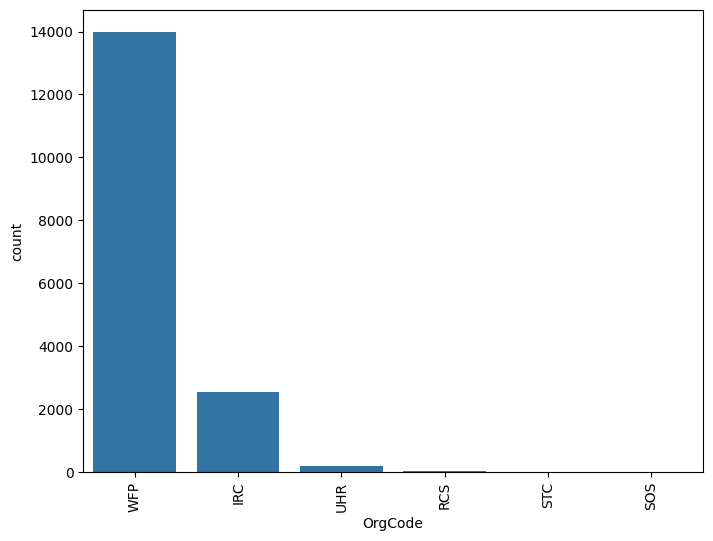

In [51]:
#plot the organizations according to the number of na values in region 
countplot_graphing(regions_na,'OrgCode',stat = 'count',orient = 'v' ,figure_size = (8, 6))

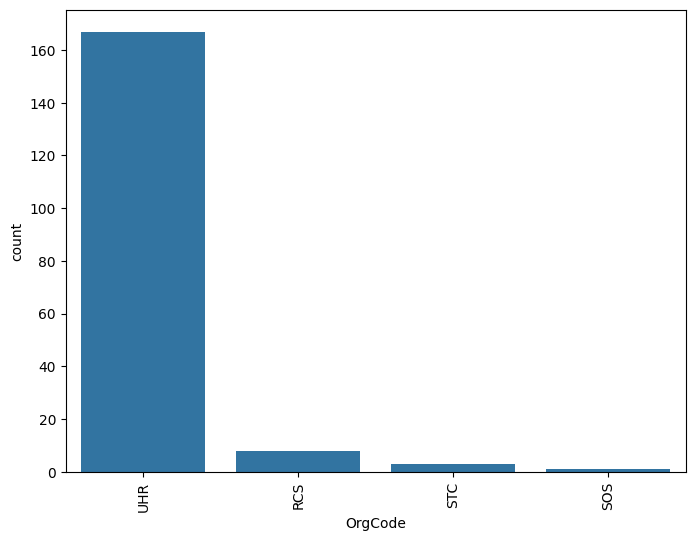

In [52]:
countplot_graphing(regions_na[regions_na['OrgCode'].isin(['UHR','RCS','STC','SOS'])],'OrgCode',orient = 'v' ,stat = 'count',figure_size = (8, 6))

### Region Submitted Missing Values 

#### Imputation for WFP

In [53]:
condition_wfp = private_public_income['OrgCode'] == 'WFP' 

In [54]:
condition_region_s = private_public_income['RegionSubmitted'].isna()

In [55]:
condition = private_public_income['CountryStandardised'] == private_public_income['Country'] 

private_public_income.loc[(condition & condition_wfp & condition_region_s),'RegionSubmitted'] = private_public_income.loc[(condition & condition_wfp & condition_region_s),'Region']


#### Imputation for IRC

In [56]:
#replace regionsubmitted by region values 
condition_irc =private_public_income['OrgCode'] == 'IRC' 

In [57]:
condition = private_public_income['CountryStandardised'] == private_public_income['Country'] 

private_public_income.loc[(condition & condition_irc & condition_region_s),'RegionSubmitted'] = private_public_income.loc[(condition & condition_irc & condition_region_s),'Region']

#### Imputation for UHR

In [58]:
condition_uhr = private_public_income['OrgCode'] == 'UHR' 

In [59]:
private_public_income[(condition_uhr) & (condition_uhr_2) & (private_public_income['Region'] == 'Europe') & (private_public_income['UNHCR market'] == 1)]

NameError: name 'condition_uhr_2' is not defined

In [60]:
private_public_income[(condition_uhr) & (private_public_income['CountrySubmitted'] == 'Italy')]

,OrgCode,CountryStandardised,CountrySubmitted,RegionSubmitted,LineDescription,IncomeAllocation,RestrictedIncome,EmergencyIncome,Source,Category,...,IncomeLCU2021,IncomeLCU2022,UNHCR market type,UNHCR market,Panel Org,UNHCR region,Group,Organization Class,Country,Region
29911,UHR,Italy,Italy,Europe,NaN,Country - raising income,Unspecified,Unspecified,Cash,Individual Giving,...,4874684.00,11384426.00,PSP,1,1,EUR,Private Sector,Intergovernmental Organizations (IGO),Italy,Europe
29920,UHR,Italy,Italy,Europe,NaN,Country - raising income,Unspecified,Unspecified,Cash,Individual Giving,...,1810903.00,3538282.00,PSP,1,1,EUR,Private Sector,Intergovernmental Organizations (IGO),Italy,Europe
29936,UHR,Italy,Italy,Europe,NaN,Country - raising income,Unspecified,Unspecified,Cash,Individual Giving,...,15673003.00,17345778.00,PSP,1,1,EUR,Private Sector,Intergovernmental Organizations (IGO),Italy,Europe
29937,UHR,Italy,Italy,Europe,NaN,Country - raising income,Unspecified,Unspecified,Cash,Individual Giving,...,169679.00,274377.00,PSP,1,1,EUR,Private Sector,Intergovernmental Organizations (IGO),Italy,Europe
29938,UHR,Italy,Italy,Europe,NaN,Country - raising income,Unspecified,Unspecified,Cash,Corporations,...,1683868.00,23449761.00,PSP,1,1,EUR,Private Sector,Intergovernmental Organizations (IGO),Italy,Europe
29939,UHR,Italy,Italy,Europe,NaN,Country - raising income,Unspecified,Unspecified,Cash,Other,...,0.00,0.00,PSP,1,1,EUR,Private Sector,Intergovernmental Organizations (IGO),Italy,Europe
29940,UHR,Italy,Italy,Europe,NaN,Country - raising income,Unspecified,Unspecified,Cash,Foundations,...,11842.00,634179.00,PSP,1,1,EUR,Private Sector,Intergovernmental Organizations (IGO),Italy,Europe
29941,UHR,Italy,Italy,Europe,NaN,Country - raising income,Unspecified,Unspecified,In-Kind,Corporations,...,30056.00,69272.00,PSP,1,1,EUR,Private Sector,Intergovernmental Organizations (IGO),Italy,Europe
29942,UHR,Italy,Italy,NaN,NaN,Country - raising income,No,Unspecified,Cash,Public Funds,...,9461814.02,9431919.78,PSP,1,1,EUR,Public Funds,Intergovernmental Organizations (IGO),Italy,Europe
29943,UHR,Italy,Italy,NaN,NaN,Country - raising income,Yes,Unspecified,Cash,Public Funds,...,50973794.86,81522496.38,PSP,1,1,EUR,Public Funds,Intergovernmental Organizations (IGO),Italy,Europe


In [61]:
#for the case of UNHCR we will modify region submitted to be equal to region 
#as it is wasteful to gothrough each country and study it individually 
private_public_income.loc[(condition & condition_uhr & condition_region_s ),'RegionSubmitted'] = private_public_income.loc[(condition & condition_uhr & condition_region_s  ),'Region']

#### Imputation for STC

In [62]:
condition_stc = private_public_income['OrgCode'] == 'STC' 
#replace the NA values by region value in region submitted 
private_public_income.loc[(condition & condition_stc & condition_region_s),'RegionSubmitted'] = private_public_income.loc[(condition & condition_stc & condition_region_s),'Region']

In [63]:
# for the remaining missing data in region and region standardized we will assign Other 
condition_na_region = private_public_income['Region'].isna()
condition_na_submitted_region = private_public_income['RegionSubmitted'].isna()
condition_na_country = private_public_income['Country'].isna()

private_public_income.loc[condition_na_region,'Region'] = 'Other' 
private_public_income.loc[condition_na_submitted_region,'RegionSubmitted'] = 'Other'
private_public_income.loc[condition_na_country,'Country'] = 'Other' 

In [64]:
private_public_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OrgCode              30227 non-null  object 
 1   CountryStandardised  30227 non-null  object 
 2   CountrySubmitted     30227 non-null  object 
 3   RegionSubmitted      30227 non-null  object 
 4   LineDescription      9690 non-null   object 
 5   IncomeAllocation     30227 non-null  object 
 6   RestrictedIncome     30227 non-null  object 
 7   EmergencyIncome      30227 non-null  object 
 8   Source               30227 non-null  object 
 9   Category             30227 non-null  object 
 10  Type                 30227 non-null  object 
 11  Item                 30227 non-null  object 
 12  CurrencyCode         30227 non-null  object 
 13  Notes                4159 non-null   object 
 14  IncomeSubmitted2010  2453 non-null   float64
 15  IncomeSubmitted2011  3081 non-null  

In [65]:
private_public_income.head()

,OrgCode,CountryStandardised,CountrySubmitted,RegionSubmitted,LineDescription,IncomeAllocation,RestrictedIncome,EmergencyIncome,Source,Category,...,IncomeLCU2021,IncomeLCU2022,UNHCR market type,UNHCR market,Panel Org,UNHCR region,Group,Organization Class,Country,Region
0,ACT,Australia,Australia,Oceania,Ind. Giving - Other,Country - raising income,Unspecified,Unspecified,Cash,Individual Giving,...,1180000.0,805000.0,NAP,1,0,APAC,Private Sector,Non-Governmental Organizations (NGOs),Australia,Asia & Pacific
1,ACT,Mozambique,Mozambique,Africa,Philanthropy & Partnerships,Country - raising income,Unspecified,Unspecified,Cash,Corporations,...,0.0,0.0,NaN,0,0,AFR,Private Sector,Non-Governmental Organizations (NGOs),Mozambique,Africa
2,ACT,Somalia,Somaliland,Africa,Philanthropy & Partnerships,Country - raising income,Unspecified,Unspecified,Cash,Foundations,...,0.0,0.0,NaN,0,0,AFR,Private Sector,Non-Governmental Organizations (NGOs),Somalia,Africa
3,ACT,Spain,Alianza (Spain),Europe,Regular Giving - Other,Country - raising income,Unspecified,Unspecified,Cash,Individual Giving,...,494000.0,1076000.0,NAP,1,0,EUR,Private Sector,Non-Governmental Organizations (NGOs),Spain,Europe
4,ACT,Spain,Alianza (Spain),Europe,Institutional,Country - raising income,Unspecified,Unspecified,Cash,Public Funds,...,10791000.0,11893000.0,NAP,1,0,EUR,Public Funds,Non-Governmental Organizations (NGOs),Spain,Europe


In [66]:
private_income = private_public_income[private_public_income['Group'] == 'Private Sector']

In [67]:
%store private_income

Stored 'private_income' (DataFrame)


In [68]:
private_public_income.iloc[774,:]

OrgCode                                                  IRC
CountryStandardised                           United Kingdom
CountrySubmitted                                 Switzerland
RegionSubmitted                                       Europe
LineDescription                                          NaN
IncomeAllocation                    Country - raising income
RestrictedIncome                                         Yes
EmergencyIncome                                           No
Source                                                  Cash
Category                                   Individual Giving
Type                                             Major Donor
Item                                             Unspecified
CurrencyCode                                             GBP
Notes                                                    NaN
IncomeSubmitted2010                                      NaN
IncomeSubmitted2011                                      NaN
IncomeSubmitted2012     

In [69]:
#function to save a dataset in a pickle format 


def save_dataset_to_pickle(dataset, filename):
    """
    Save a dataset to a pickle file.

    Parameters:
    - dataset: The dataset to be saved.
    - filename: The name of the pickle file (including the .pkl extension).
    """
    with open(filename, 'wb') as file:
        pickle.dump(private_public_income, file)
    print(f'Dataset saved to {filename}')


In [70]:
save_dataset_to_pickle(private_income,"private_income.pkl")

Dataset saved to private_income.pkl


In [71]:
save_dataset_to_pickle(private_public_income,"private_public_income.pkl")

Dataset saved to private_public_income.pkl
